# 📊 Telco Customer Churn Prediction

---
This notebook includes:
- Data Loading & Cleaning
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Training (LR + RF)
- Hyperparameter Optimization
- Advanced Visualizations
- Feature Importance
- Saving Models
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import joblib
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 5)


## Load the Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Overview & Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.drop(columns=['customerID'], inplace=True)
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_13016\745411753.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploratory Data Analysis (EDA)

### 🔸 Churn Distribution

C:\Users\HP\AppData\Local\Temp\ipykernel_13016\3760162805.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='viridis')


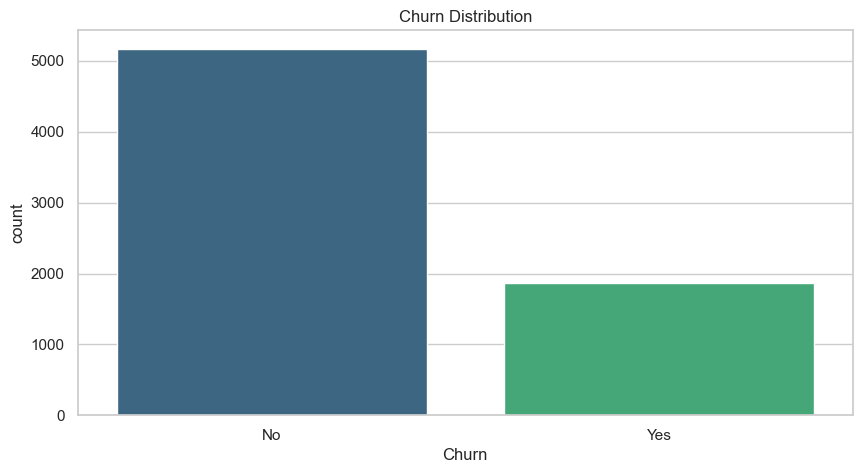

In [5]:
sns.countplot(data=df, x='Churn', palette='viridis')
plt.title('Churn Distribution')
plt.show()

### 🔸 Monthly Charges vs Churn

C:\Users\HP\AppData\Local\Temp\ipykernel_13016\2804674452.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')


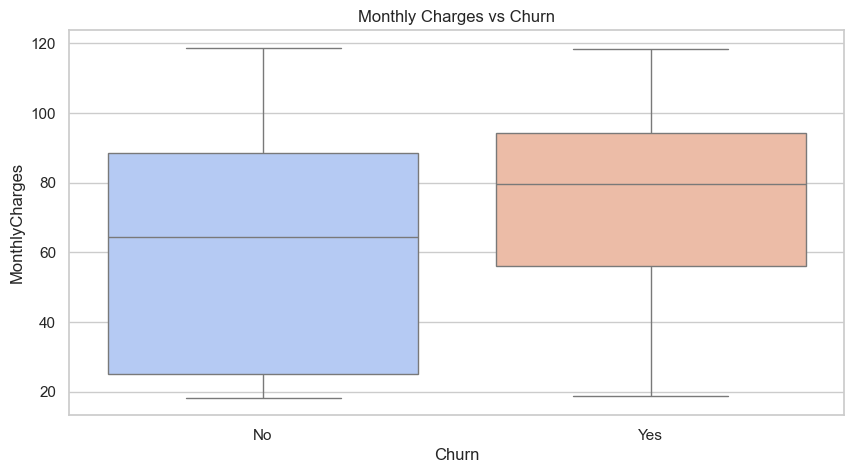

In [6]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='coolwarm')
plt.title('Monthly Charges vs Churn')
plt.show()

## Prepare Target Column

In [7]:
df['target'] = df['Churn'].map(lambda x: 1 if x=='Yes' else 0)
df.drop(columns=['Churn'], inplace=True)
df['target'].value_counts()

target
0    5174
1    1869
Name: count, dtype: int64

## Feature Engineering & Encoding

In [8]:
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('target')
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,target,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


## Train/Test Split

In [9]:
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape

((5634, 30), (1409, 30))

## Scale Numerical Features

In [10]:
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## Model Training (Baseline Models)

In [11]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
rf = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)

log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Model Evaluation

In [12]:
def evaluate(model):
    preds = model.predict(X_test)
    probs = model.predict_proba(X_test)[:,1]
    print('Accuracy:', accuracy_score(y_test, preds))
    print('Precision:', precision_score(y_test, preds))
    print('Recall:', recall_score(y_test, preds))
    print('F1 Score:', f1_score(y_test, preds))
    print('ROC AUC:', roc_auc_score(y_test, probs))
    print('\nConfusion Matrix:')
    print(confusion_matrix(y_test, preds))

print('Logistic Regression:')
evaluate(log_reg)

print('\nRandom Forest:')
evaluate(rf)

Logistic Regression:
Accuracy: 0.7381121362668559
Precision: 0.504302925989673
Recall: 0.7834224598930482
F1 Score: 0.6136125654450262
ROC AUC: 0.8416905629181844

Confusion Matrix:
[[747 288]
 [ 81 293]]

Random Forest:
Accuracy: 0.7885024840312278
Precision: 0.6283783783783784
Recall: 0.49732620320855614
F1 Score: 0.5552238805970149
ROC AUC: 0.8237541656978996

Confusion Matrix:
[[925 110]
 [188 186]]


## Hyperparameter Optimization (GridSearchCV)

In [13]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid, cv=3, scoring='f1', n_jobs=-1)
grid.fit(X_train, y_train)

best_rf = grid.best_estimator_
grid.best_params_

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}

## Feature Importance (Random Forest)

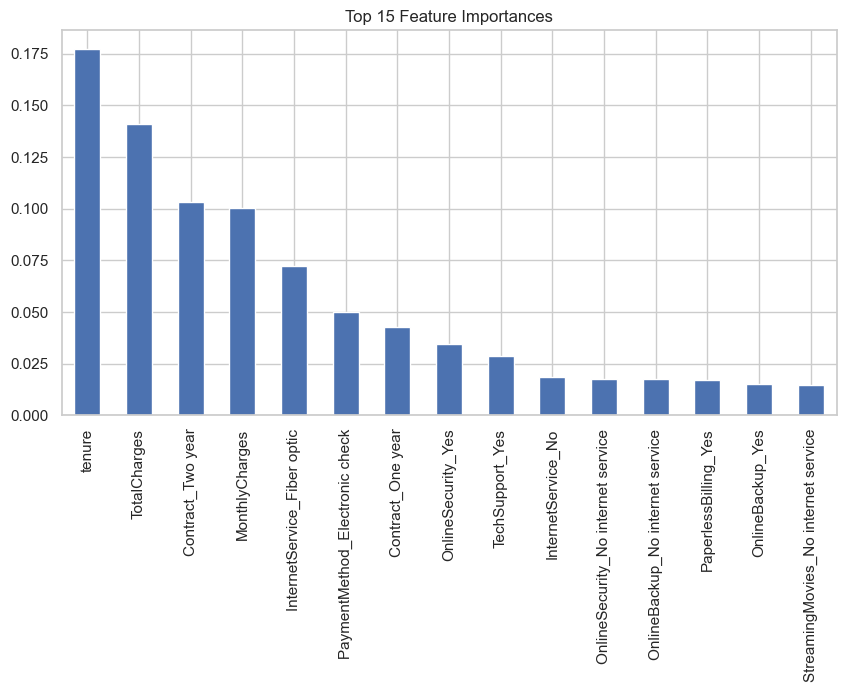

In [14]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns).sort_values(ascending=False)
importances.head(15).plot(kind='bar', figsize=(10,5), title='Top 15 Feature Importances')
plt.show()

## Save Trained Models

In [ ]:
joblib.dump(best_rf, 'optimized_random_forest.joblib')
joblib.dump(log_reg, 'logistic_regression_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
'Models saved!'